<a href="https://colab.research.google.com/github/DennisMuasyaWambua/Audio_processing/blob/main/audio_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import librosa
import matplotlib.pyplot as plt
import librosa.display
import IPython
import IPython.display as ipd
from IPython.display import Audio,display
import numpy as np


In [2]:
wood_chop = '/content/sample_data/audio/wood_chop.wav'
chainsaw_wood = '/content/sample_data/audio/chainsaw_wood.wav'


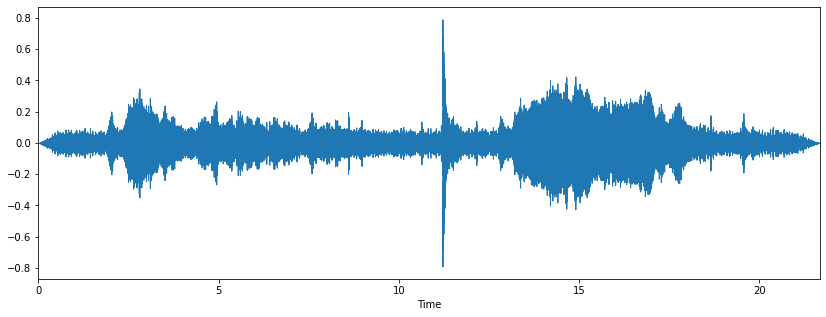

In [3]:
plt.figure(figsize=(14,5))
chainsaw,sample_rate = librosa.load(chainsaw_wood)
axe,sr = librosa.load(wood_chop)
librosa.display.waveplot(chainsaw, sr=sample_rate)
#librosa.display.waveplot(axe,sr=sr)
ipd.Audio(chainsaw_wood)
#ipd.Audio(wood_chop)

In [4]:
axe

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [5]:
#duration of a sample of axe sounds is
sample_duration_axe = 1/sr
print(f"The duration of a sound sample of an axe chop is:{sample_duration_axe:6f}seconds")
sample_duration_chainsaw = 1/sample_rate
print(f"The duration of a sound sample of a chainsaw is:{sample_duration_chainsaw:f}seconds")

The duration of a sound sample of an axe chop is:0.000045seconds
The duration of a sound sample of a chainsaw is:0.000045seconds


In [6]:
#the length of both audio signals
axe_duration = sample_duration_axe*len(axe)
chainsaw_duration = sample_duration_chainsaw*len(chainsaw)

print(f"The length of an axe signal is: {axe_duration:6f}seconds")
print(f"The length of an axe signal is: {chainsaw_duration:6f}seconds")

The length of an axe signal is: 17.736009seconds
The length of an axe signal is: 21.681633seconds


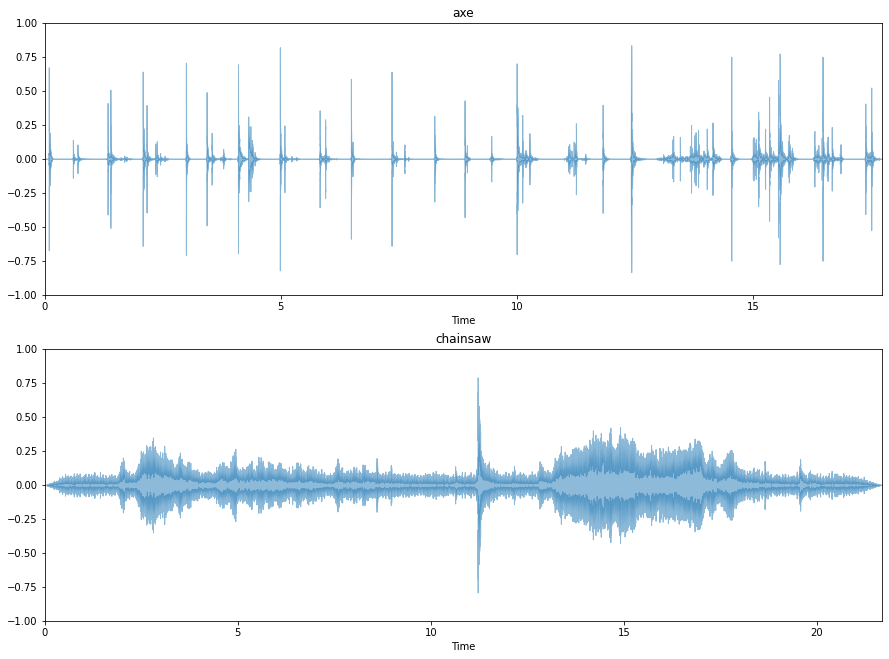

In [7]:
#ivisualizing the waveforms
plt.figure(figsize=(15,17))

plt.subplot(3,1,1)
librosa.display.waveplot(axe, alpha=0.5)
plt.title("axe")
plt.ylim(-1,1)

plt.subplot(3,1,2)
librosa.display.waveplot(chainsaw, alpha=0.5)
plt.title("chainsaw")
plt.ylim(-1,1)

plt.show()

In [12]:
FRAME_SIZE = 1024
HOP_LENGTH= 512
#calculate the amplitiude envelope
def amplitiude_envelope(signal, frame_size, hop_length):
  amplitiude_envelope=[]
  #calculating the amplitiude envelope for each frame
  for i in range(0, len(signal),frame_size):
    current_frame_amplitiude_envelope = max(signal[i:i+frame_size])
    amplitiude_envelope.append(current_frame_amplitiude_envelope)
  return np.array(amplitiude_envelope)

In [14]:
# Amplitiude envelope for chainsaw
ae_chainsaw = amplitiude_envelope(chainsaw,FRAME_SIZE,HOP_LENGTH)
print(len(ae_chainsaw))
ae_axe = amplitiude_envelope(axe,FRAME_SIZE,HOP_LENGTH)
print(len(ae_axe))

467
382


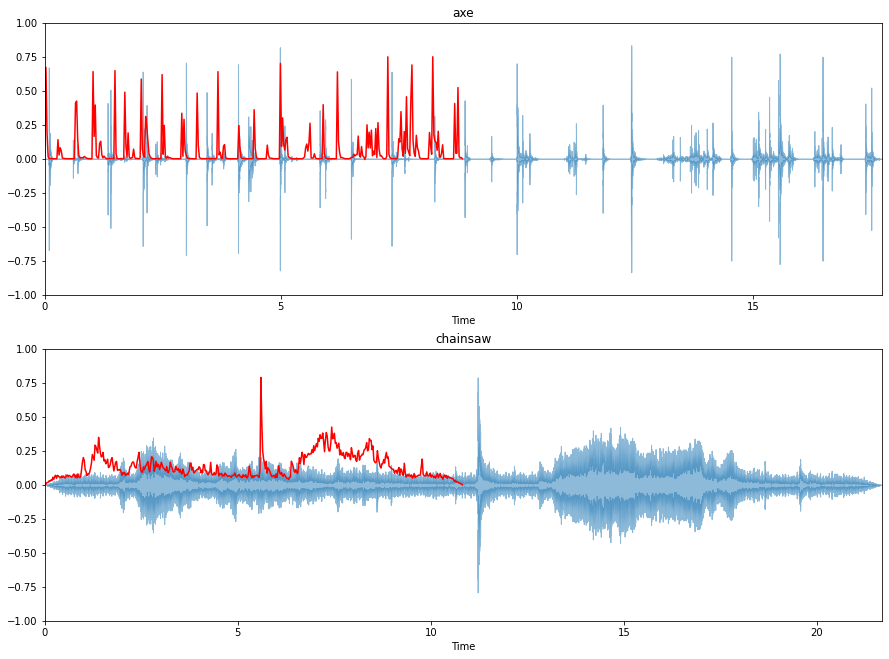

In [19]:
#visualize the amplitiude envelope for all the audio files
frames = range(0,ae_axe.size)
frame = range(0,ae_chainsaw.size)
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)
T = librosa.frames_to_time(frame,hop_length=HOP_LENGTH)

plt.figure(figsize=(15,17))

plt.subplot(3,1,1)
librosa.display.waveplot(axe, alpha=0.5)
plt.plot(t,ae_axe, color="r")
plt.title("axe")
plt.ylim(-1,1)

plt.subplot(3,1,2)
librosa.display.waveplot(chainsaw, alpha=0.5)
plt.plot(T,ae_chainsaw, color="r")
plt.title("chainsaw")
plt.ylim(-1,1)

plt.show()

In [25]:
#Extracting the root mean square energy with librosa
FRAME_LENGTH = 1024
HOP_LENGTH = 512

rms_chainsaw = librosa.feature.rms(chainsaw,frame_length = FRAME_LENGTH, hop_length=HOP_LENGTH)[0]
rms_axe = librosa.feature.rms(axe,frame_length = FRAME_LENGTH, hop_length=HOP_LENGTH)[0]

In [26]:
print("Axe rms shape", rms_axe.shape)
print("Chainsaw rms shape", rms_chainsaw.shape)

Axe rms shape (764,)
Chainsaw rms shape (934,)


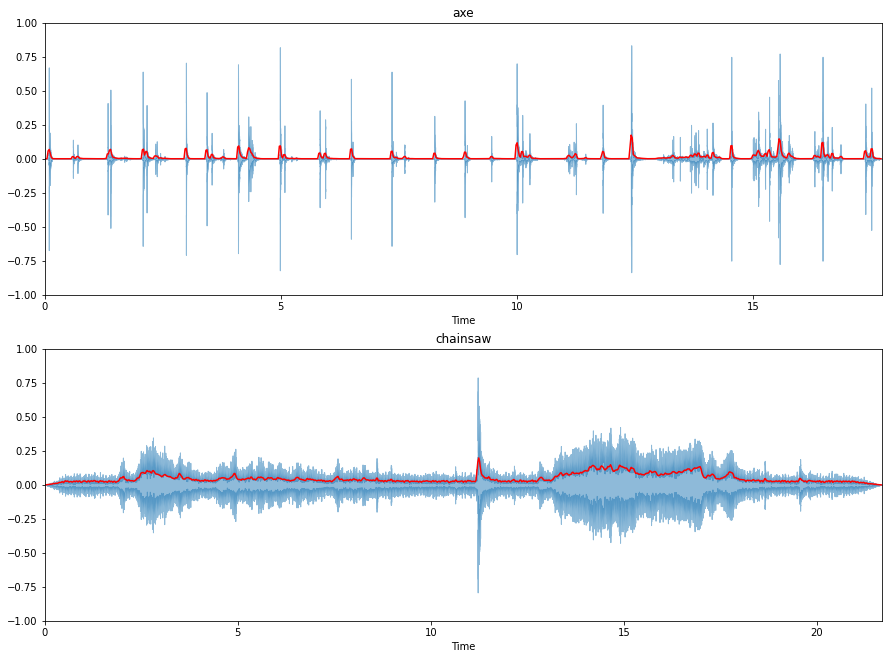

In [27]:
#Plotting the RMS for all the music pieces

frames = range(0,rms_axe.size)
frame = range(0,rms_chainsaw.size)
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)
T = librosa.frames_to_time(frame,hop_length=HOP_LENGTH)


plt.figure(figsize=(15,17))

plt.subplot(3,1,1)
librosa.display.waveplot(axe, alpha=0.5)
plt.plot(t,rms_axe, color="r")
plt.title("axe")
plt.ylim(-1,1)

plt.subplot(3,1,2)
librosa.display.waveplot(chainsaw, alpha=0.5)
plt.plot(T,rms_chainsaw, color="r")
plt.title("chainsaw")
plt.ylim(-1,1)

plt.show()

In [28]:
#rms our own implementation function
def rms(signal,frame_length, hop_length):
  rms = []
  for i in range(0,len(signal),hop_length):
    rms_current_frame = np.sqrt(np.sum(signal[i:i+frame_length]**2)/frame_length) 
    rms.append(rms_current_frame)
  return np.array(rms)


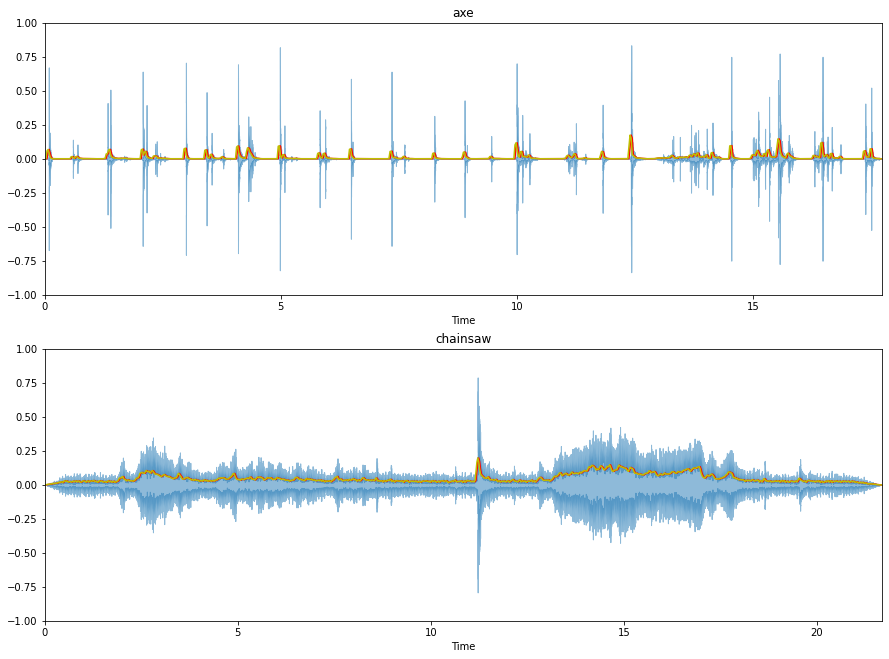

In [30]:
rms1_chainsaw = rms(chainsaw,frame_length = FRAME_LENGTH, hop_length=HOP_LENGTH)
rms1_axe = rms(axe,frame_length = FRAME_LENGTH, hop_length=HOP_LENGTH)


frames = range(0,rms_axe.size)
frame = range(0,rms_chainsaw.size)
t = librosa.frames_to_time(frames, hop_length=HOP_LENGTH)
T = librosa.frames_to_time(frame,hop_length=HOP_LENGTH)


plt.figure(figsize=(15,17))

plt.subplot(3,1,1)
librosa.display.waveplot(axe, alpha=0.5)
plt.plot(t,rms_axe, color="r")
plt.plot(t,rms1_axe, color="y")
plt.title("axe")
plt.ylim(-1,1)

plt.subplot(3,1,2)
librosa.display.waveplot(chainsaw, alpha=0.5)
plt.plot(T,rms_chainsaw, color="r")
plt.plot(T,rms1_chainsaw, color="y")
plt.title("chainsaw")
plt.ylim(-1,1)

plt.show()

In [36]:
#zero crossing rate
zcr_chainsaw = librosa.feature.zero_crossing_rate(chainsaw,frame_length = FRAME_LENGTH, hop_length=HOP_LENGTH)[0]
zcr_axe = librosa.feature.zero_crossing_rate(axe,frame_length = FRAME_LENGTH, hop_length=HOP_LENGTH)[0]

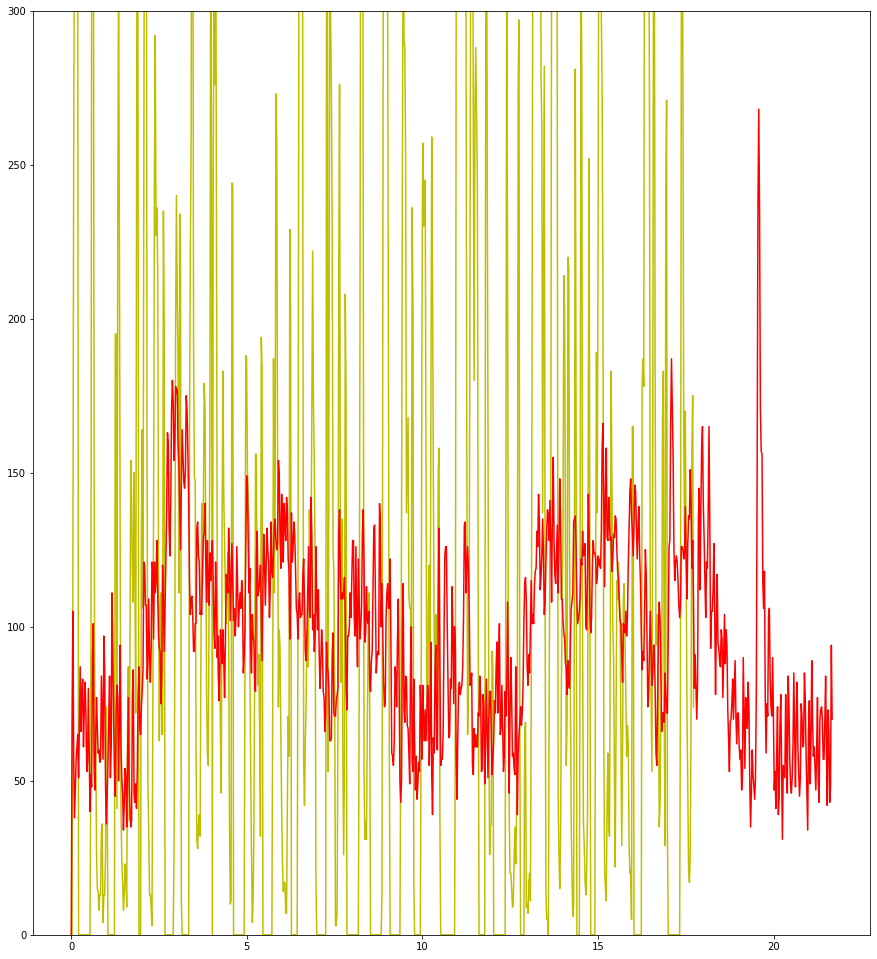

In [37]:
#visualize the zero crossing rate 
plt.figure(figsize=(15,17))
plt.plot(t,zcr_axe*FRAME_LENGTH, color="y")
plt.plot(T,zcr_chainsaw*FRAME_LENGTH, color="r")
plt.ylim((0,300))
plt.show()